# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
!pip install warning

In [1]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

#df = pd.read_parquet(r'trip_records\2023-1.parquet')
#df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# df['tpep_pickup_datetime'].dt.day.value_counts()

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
#hour_data = df[df['tpep_pickup_datetime'].dt.hour==0]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

In [ ]:
# Final dataframe to hold all monthly samples
final_df = pd.DataFrame()

# Iterate over monthly files
for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)
        pq = pd.read_parquet(file_path)

        # Parse datetime and drop rows with invalid values
        pq['tpep_pickup_datetime'] = pd.to_datetime(pq['tpep_pickup_datetime'], errors='coerce')
        pq = pq.dropna(subset=['tpep_pickup_datetime'])

        # Extract day and hour from pickup time
        pq['pickup_day'] = pq['tpep_pickup_datetime'].dt.day
        pq['pickup_hour'] = pq['tpep_pickup_datetime'].dt.hour

        # Get year, month, and number of days
        year = pq['tpep_pickup_datetime'].dt.year.iloc[0]
        month = pq['tpep_pickup_datetime'].dt.month.iloc[0]
        num_days = calendar.monthrange(year, month)[1]

        # Collect 1% samples per hour of each day
        samples = []
        for day in range(1, num_days + 1):
            for hour in range(24):
                hour_data = pq[(pq['pickup_day'] == day) & (pq['pickup_hour'] == hour)]
                if not hour_data.empty:
                    samples.append(hour_data.sample(frac=0.01, random_state=42))

        # Concatenate sampled data from this file
        if samples:
            sampled_data = pd.concat(samples, ignore_index=True)
            final_df = pd.concat([final_df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [5]:
final_df.shape

(379270, 22)

In [6]:
# Store the df in csv/parquet
# df.to_parquet('')
final_df.to_parquet('sampled_trip_data.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file

#df = final_df
df = pd.read_parquet(r'sampled_trip_data.parquet')

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,Airport_fee
0,2,2023-01-01 00:31:50,2023-01-01 00:44:17,2.0,2.85,1.0,N,263,41,1,...,0.5,4.12,0.0,1.0,24.72,2.5,0.0,1,0,NaN
1,2,2023-01-01 00:10:50,2023-01-01 00:24:12,4.0,1.32,1.0,N,90,137,1,...,0.5,3.56,0.0,1.0,21.36,2.5,0.0,1,0,NaN
2,2,2023-01-01 00:25:37,2023-01-01 00:34:52,1.0,3.17,1.0,N,79,141,1,...,0.5,3.98,0.0,1.0,23.88,2.5,0.0,1,0,NaN
3,2,2023-01-01 00:27:26,2023-01-01 00:52:20,2.0,3.80,1.0,N,142,107,2,...,0.5,0.00,0.0,1.0,29.70,2.5,0.0,1,0,NaN
4,2,2023-01-01 00:59:15,2023-01-01 01:23:15,NaN,7.97,NaN,None,140,17,0,...,0.5,8.17,0.0,1.0,49.00,NaN,NaN,1,0,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379270 entries, 0 to 379269
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379270 non-null  int64         
 1   tpep_pickup_datetime   379270 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379270 non-null  datetime64[us]
 3   passenger_count        366320 non-null  float64       
 4   trip_distance          379270 non-null  float64       
 5   RatecodeID             366320 non-null  float64       
 6   store_and_fwd_flag     366320 non-null  object        
 7   PULocationID           379270 non-null  int64         
 8   DOLocationID           379270 non-null  int64         
 9   payment_type           379270 non-null  int64         
 10  fare_amount            379270 non-null  float64       
 11  extra                  379270 non-null  float64       
 12  mta_tax                379270 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [5]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [6]:
# Combine the two airport fee column
df['unified_airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

# Drop the originals
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)

df = df[df['unified_airport_fee'] >= 0]

df.reset_index(drop=True, inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [7]:
# check where values of fare amount are negative
df[df.total_amount<0].fare_amount

66044     0.0
69602     0.0
72915     0.0
104299    0.0
124431    0.0
134182    0.0
185222    0.0
190763    0.0
192349    0.0
257850    0.0
298843    0.0
335584    0.0
Name: fare_amount, dtype: float64

Did you notice something different in the `RatecodeID` column for above records?

In [126]:
# Analyse RatecodeID for the negative fare amounts

df[df.total_amount<0].RatecodeID

Series([], Name: RatecodeID, dtype: float64)

In [34]:
# Find which columns have negative values

df[df.fare_amount<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,unified_airport_fee


In [8]:
# fix these negative values

df = df[df["total_amount"] >= 0]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [41]:
# Find the proportion of missing values in each column

df.isnull().mean()

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
pickup_day               0.0
pickup_hour              0.0
unified_airport_fee      0.0
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [42]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.passenger_count.value_counts()

passenger_count
1.0    276143
2.0     55095
3.0     13726
4.0      7577
0.0      5802
5.0      4758
6.0      3199
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

In [9]:
# Calculate mode (most common value excluding 0)
mode_passenger_count = df[df["passenger_count"] != 0]["passenger_count"].mode()[0]

# Replace 0s with the mode
df["passenger_count"] = df["passenger_count"].replace(0, mode_passenger_count)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [52]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.value_counts()

RatecodeID
1.0    345921
2.0     14285
7.0      2136
5.0      2057
3.0      1182
4.0       724
Name: count, dtype: int64

In [10]:
df.RatecodeID = df.RatecodeID.apply(lambda x: x if x!=99 else 7)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [55]:
# handle null values in congestion_surcharge
df.congestion_surcharge.isnull().mean()

np.float64(0.0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [11]:
# Handle any remaining missing values
df[df.extra<0]
df = df[df["extra"] >= 0]

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [62]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,unified_airport_fee
count,366299.000000,366299,366299,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000,366299.000000
mean,1.737624,2023-07-01 20:40:14.233071,2023-07-01 20:57:29.589455,1.383034,3.486189,1.108777,165.420550,164.215881,1.204494,20.093907,1.632628,0.495456,3.568082,0.589065,0.999343,29.203001,2.308538,15.502199,14.299007,0.141913
min,1.000000,2001-01-01 00:06:49,2001-01-01 15:42:11,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,2023-04-01 21:07:59,2023-04-01 21:23:43.500000,1.000000,1.060000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,8.000000,11.000000,0.000000
50%,2.000000,2023-06-26 08:43:33,2023-06-26 08:56:48,1.000000,1.780000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.860000,0.000000,1.000000,21.000000,2.500000,15.000000,15.000000,0.000000
75%,2.000000,2023-10-05 19:24:09,2023-10-05 19:39:01,1.000000,3.350000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.420000,0.000000,1.000000,30.600000,2.500000,23.000000,19.000000,0.000000
max,2.000000,2024-01-01 00:01:34,2024-01-01 20:14:57,6.000000,9678.780000,7.000000,265.000000,265.000000,4.000000,143163.450000,14.250000,4.000000,150.290000,143.000000,1.000000,143167.450000,2.500000,31.000000,23.000000,1.750000
std,0.439926,NaN,NaN,0.875166,23.052242,0.597847,63.712428,69.754177,0.465491,237.218127,1.828332,0.047913,4.043909,2.171638,0.023877,237.606489,0.664830,8.700708,5.774724,0.463231


In [63]:
# Loop through numeric columns and find outliers
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} potential outliers")

VendorID: 0 potential outliers
passenger_count: 84355 potential outliers
trip_distance: 48450 potential outliers
RatecodeID: 20379 potential outliers
PULocationID: 0 potential outliers
DOLocationID: 0 potential outliers
payment_type: 67732 potential outliers
fare_amount: 37880 potential outliers
extra: 6521 potential outliers
mta_tax: 3353 potential outliers
tip_amount: 28220 potential outliers
tolls_amount: 29452 potential outliers
improvement_surcharge: 286 potential outliers
total_amount: 42785 potential outliers
congestion_surcharge: 28053 potential outliers
pickup_day: 0 potential outliers
pickup_hour: 0 potential outliers
unified_airport_fee: 31986 potential outliers


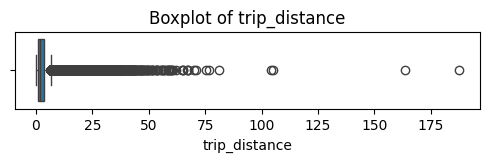

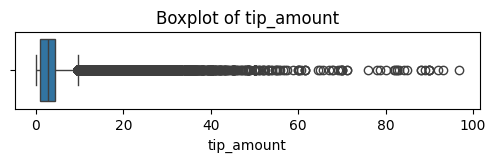

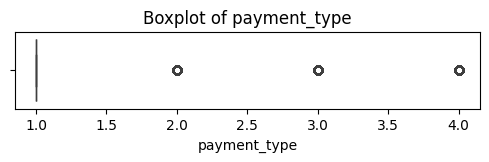

In [155]:
sel_col =  ['trip_distance','tip_amount','payment_type']
for col in sel_col:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [12]:
df[(df.trip_distance<0.1) & (df.fare_amount>300)]
df = df[~((df["trip_distance"] < 0.1) & (df["fare_amount"] > 300))] # Drop these

In [80]:
df[(df.trip_distance==0)&(df.fare_amount==0)&(df.PULocationID != df.DOLocationID)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,unified_airport_fee


In [75]:
df[(df.PULocationID==138)&(df.DOLocationID==264)].trip_distance.mean()

np.float64(8.24642857142857)

In [13]:
df = df[~((df.trip_distance==0)&(df.fare_amount==0)&(df.PULocationID != df.DOLocationID))] # removing

In [154]:
df = df[df.trip_distance<250]

In [73]:
df.payment_type.value_counts()

payment_type
1    298567
2     63275
4      2717
3      1740
Name: count, dtype: int64

In [14]:
# remove passenger_count > 6
df = df[df.passenger_count < 7]

In [15]:
# Continue with outlier handling
df = df[df.tip_amount<100]

In [ ]:
# Do any columns need standardising? no


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: xlabel='pickup_hour'>

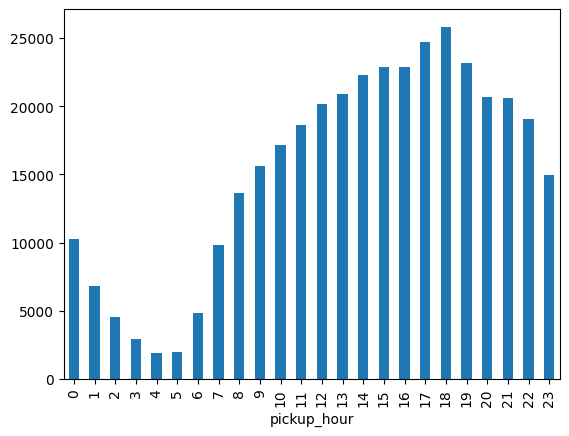

In [97]:
# Find and show the hourly trends in taxi pickups

#df.groupby('pickup_hour').fare_amount.sum().plot.bar()
df.pickup_hour.value_counts().sort_index().plot.bar()

<Axes: xlabel='pickup_hour'>

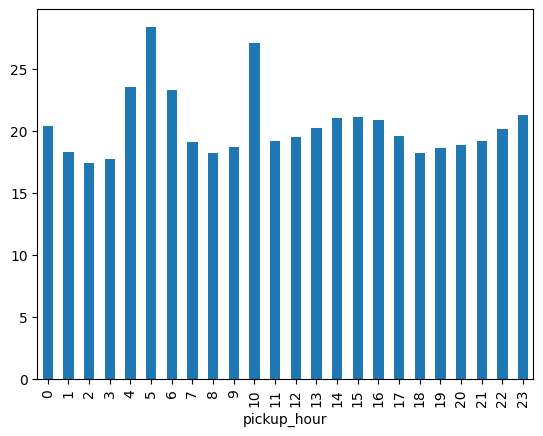

In [98]:
df.groupby('pickup_hour').fare_amount.mean().plot.bar()

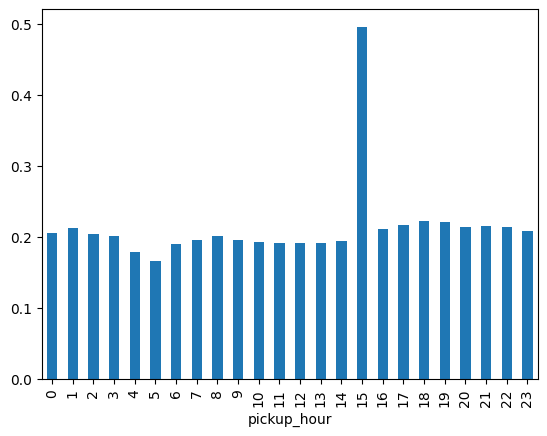

In [16]:
df = df[df['fare_amount'] > 0]  # Avoid division by zero
df['tip_pct'] = df['tip_amount'] / df['fare_amount']

df.groupby('pickup_hour')['tip_pct'].mean().plot.bar()
plt.show()

<Axes: xlabel='pickup_hour'>

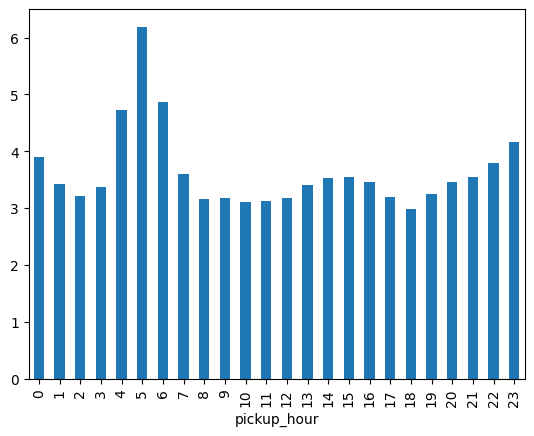

In [101]:
df.groupby('pickup_hour')['trip_distance'].mean().plot.bar()

<Axes: xlabel='pickup_weekday'>

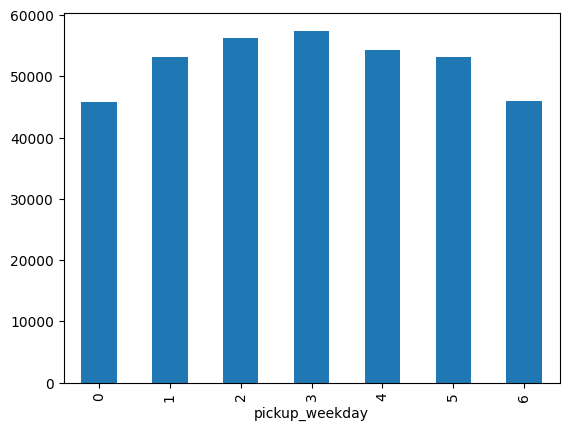

In [17]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.dayofweek
df.pickup_weekday.value_counts().sort_index().plot.bar()


<Axes: xlabel='pickup_weekday'>

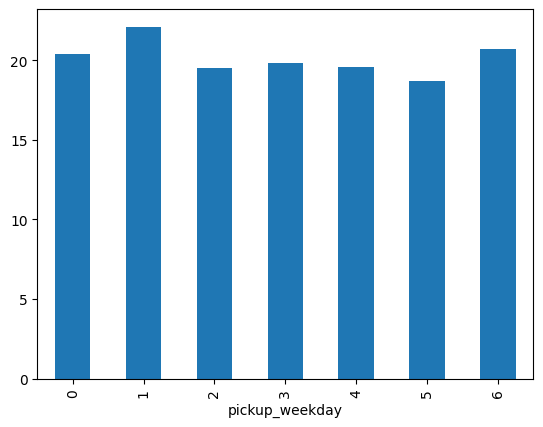

In [104]:
df.groupby('pickup_weekday').fare_amount.mean().plot.bar()

<Axes: xlabel='pickup_weekday'>

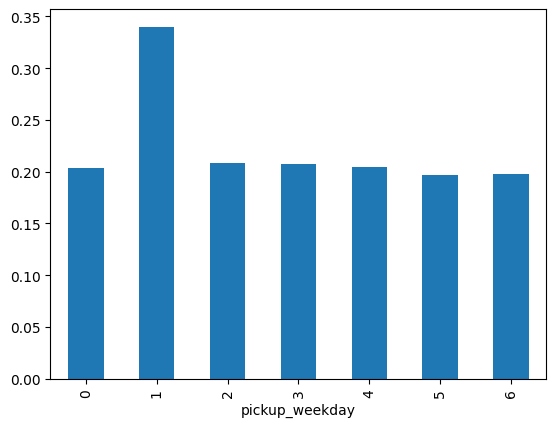

In [105]:
df.groupby('pickup_weekday')['tip_pct'].mean().plot.bar()

<Axes: xlabel='pickup_weekday'>

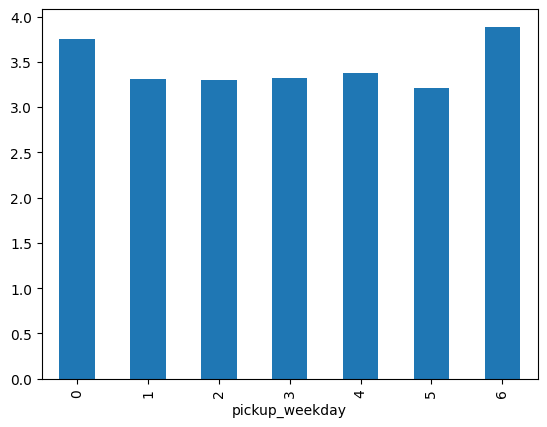

In [106]:
df.groupby('pickup_weekday')['trip_distance'].mean().plot.bar()

<Axes: xlabel='pickup_month_name'>

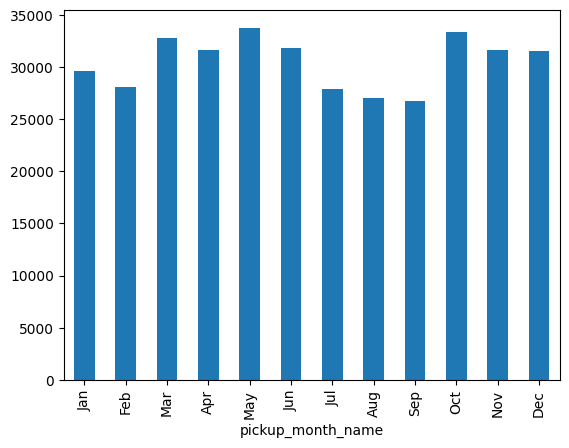

In [18]:
# Show the monthly trends in pickups
# Extract month number and name
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.strftime('%b')  # Jan, Feb, etc.
df['pickup_month_name'].value_counts().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]).plot.bar()

<Axes: xlabel='pickup_month_name'>

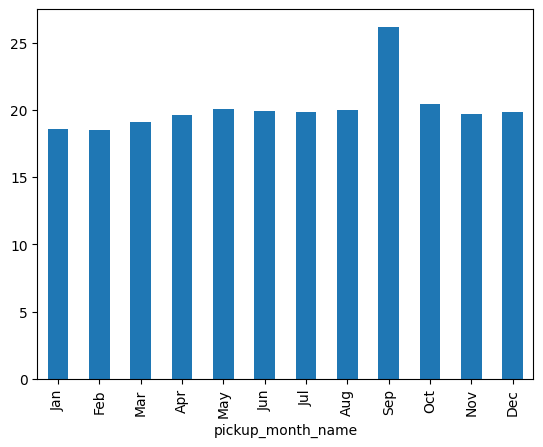

In [19]:
df.groupby('pickup_month_name')['fare_amount'].mean().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]).plot.bar()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [25]:
# Analyse the above parameters
df[df['trip_distance']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,unified_airport_fee,tip_pct,pickup_weekday,pickup_month,pickup_month_name
22,1,2023-01-01 00:45:06,2023-01-01 00:54:06,1.0,0.0,1.0,N,48,48,2,...,1.0,13.60,2.5,1,0,0.0,0.000000,6,1,Jan
60,2,2023-01-01 01:34:06,2023-01-01 01:34:14,2.0,0.0,5.0,N,265,265,1,...,1.0,61.20,0.0,1,1,0.0,0.204000,6,1,Jan
77,1,2023-01-01 01:25:41,2023-01-01 01:25:45,1.0,0.0,1.0,N,148,148,1,...,1.0,60.00,2.5,1,1,0.0,17.333333,6,1,Jan
83,1,2023-01-01 01:26:38,2023-01-01 01:27:12,1.0,0.0,5.0,N,229,229,1,...,1.0,6.00,0.0,1,1,0.0,0.000000,6,1,Jan
84,2,2023-01-01 01:20:00,2023-01-01 01:20:02,4.0,0.0,5.0,N,264,264,1,...,1.0,46.80,0.0,1,1,0.0,0.017778,6,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365652,2,2023-09-30 13:14:24,2023-09-30 13:14:37,3.0,0.0,2.0,N,246,246,2,...,1.0,74.00,2.5,30,13,0.0,0.000000,5,9,Sep
365911,2,2023-09-30 17:17:25,2023-09-30 17:36:25,1.0,0.0,1.0,N,264,264,1,...,1.0,25.48,2.5,30,17,0.0,0.376923,5,9,Sep
366033,1,2023-09-30 19:44:14,2023-09-30 19:44:36,1.0,0.0,1.0,N,168,168,2,...,1.0,4.50,0.0,30,19,0.0,0.000000,5,9,Sep
366218,1,2023-09-30 22:25:15,2023-09-30 22:25:19,1.0,0.0,1.0,N,152,152,1,...,1.0,36.00,0.0,30,22,0.0,0.000000,5,9,Sep


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [20]:
# Create a df with non zero entries for the selected parameters.
cols = ['trip_distance', 'tip_amount', 'fare_amount', 'total_amount']
df_copy = df.copy()

for col in cols:
    df_copy = df_copy[df_copy[col] > 0]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: xlabel='pickup_month_name'>

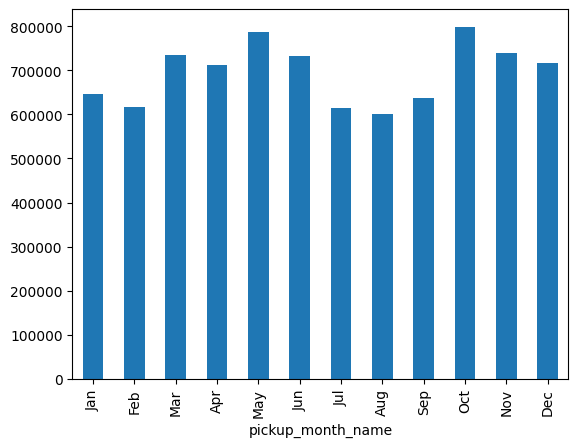

In [29]:
# Group data by month and analyse monthly revenue
df_copy.groupby('pickup_month_name').total_amount.sum().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]).plot.bar()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<Axes: xlabel='quarter'>

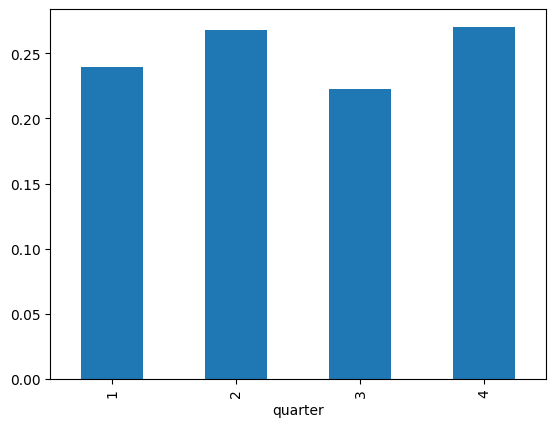

In [21]:
# Calculate proportion of each quarter

df_copy['quarter'] = df_copy['tpep_pickup_datetime'].dt.quarter
quarter_revenue = df_copy.groupby('quarter')['total_amount'].sum()
revenue_proportion = quarter_revenue / quarter_revenue.sum()

revenue_proportion.plot.bar()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

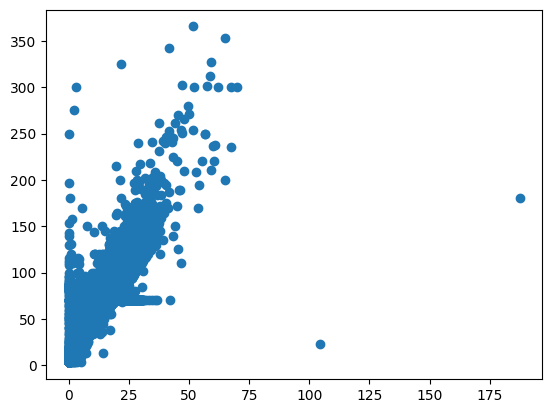

In [ ]:
# Show how trip fare is affected by distance

plt.scatter(df_copy.trip_distance,df_copy.fare_amount)
plt.show()

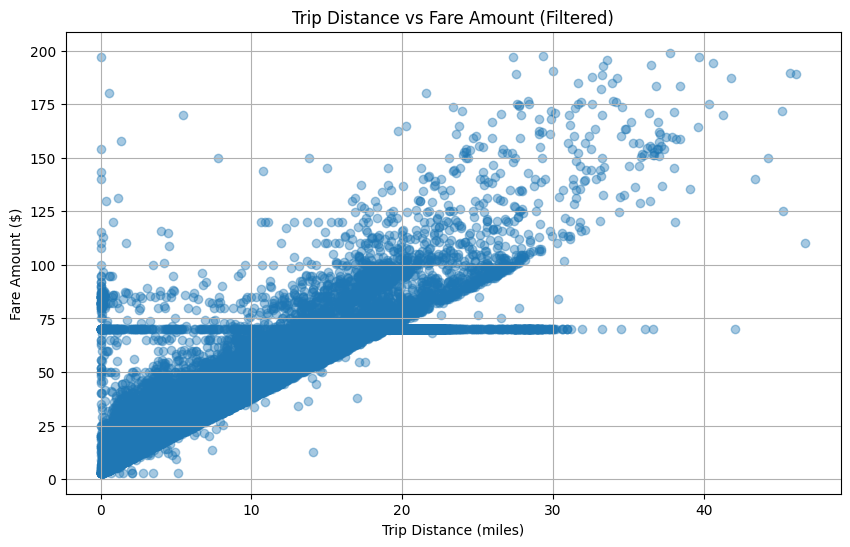

In [22]:
plt.figure(figsize=(10, 6))
filtered_df = df_copy[(df_copy.trip_distance < 50) & (df_copy.fare_amount < 200)]
plt.scatter(filtered_df.trip_distance, filtered_df.fare_amount, alpha=0.4)
plt.title('Trip Distance vs Fare Amount (Filtered)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

In [23]:
flat_fares = filtered_df[(filtered_df.fare_amount >= 67) & (filtered_df.fare_amount <= 75)]
flat_fares.fare_amount.describe()

count    11580.000000
mean        70.054970
std          0.672611
min         67.000000
25%         70.000000
50%         70.000000
75%         70.000000
max         75.000000
Name: fare_amount, dtype: float64

In [ ]:
# the line is at 70$ investigating that
flat_fares['RatecodeID'].value_counts()
# This is because JFK flate fare rate is applied

RatecodeID
2.0    10596
1.0      879
5.0       40
3.0       38
4.0       27
Name: count, dtype: int64

In [24]:
corr_filtered = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation (filtered): {corr_filtered:.3f}")

Correlation (filtered): 0.954


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [25]:
# Deriving trip_duration 
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df_copy['trip_duration'] = (df_copy['tpep_dropoff_datetime'] - df_copy['tpep_pickup_datetime']).dt.total_seconds() / 60

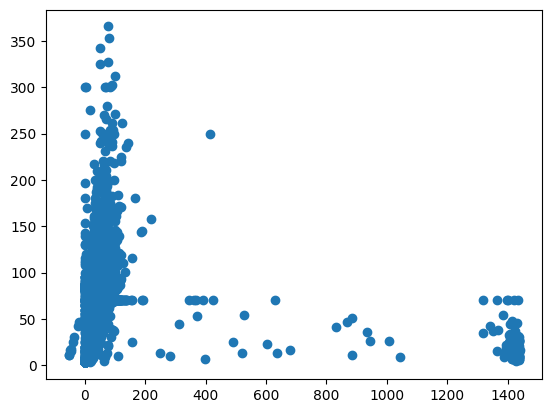

In [47]:
# Show relationship between fare and trip duration
plt.scatter(df_copy.trip_duration,df_copy.fare_amount)
plt.show()

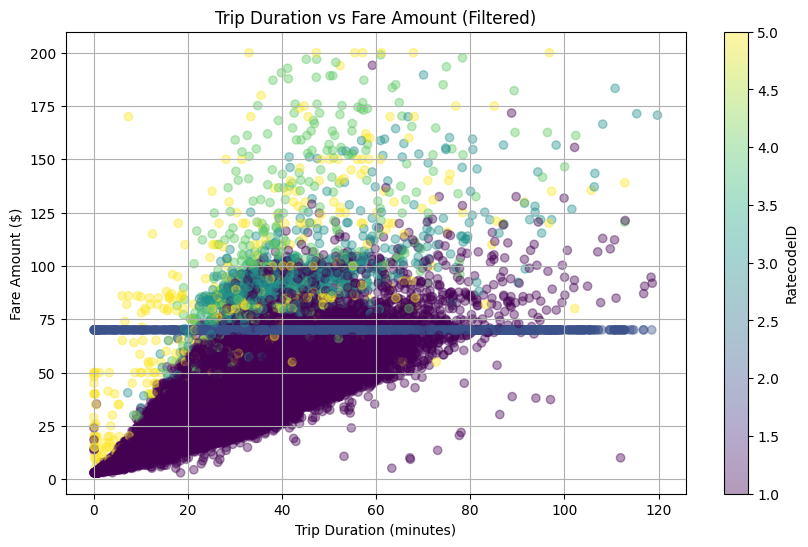

In [26]:
df_filtered = df_copy[(df_copy['trip_duration'] <= 120) & (df_copy['fare_amount'] <= 200)]
df_filtered = df_filtered[~((df_filtered['trip_duration'] < 5) & (df_filtered['fare_amount'] > 50) & (df_filtered['RatecodeID'] != 2))]
df_filtered = df_filtered[df_filtered.trip_duration > 0]

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered.trip_duration, df_filtered.fare_amount,c=df_filtered['RatecodeID'], cmap='viridis', alpha=0.4)
plt.title('Trip Duration vs Fare Amount (Filtered)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.colorbar(label='RatecodeID')
plt.show()

In [27]:
corr_filtered = df_filtered['trip_duration'].corr(df_filtered['fare_amount'])
print(f"Correlation (filtered): {corr_filtered:.3f}")

Correlation (filtered): 0.878


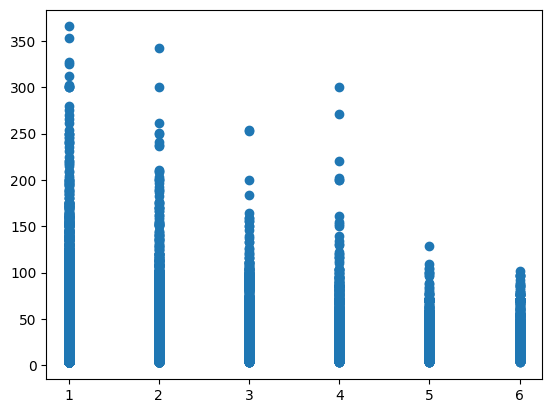

In [ ]:
# Show relationship between fare and number of passengers
plt.scatter(df_copy.passenger_count,df_copy.fare_amount)
plt.show()

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

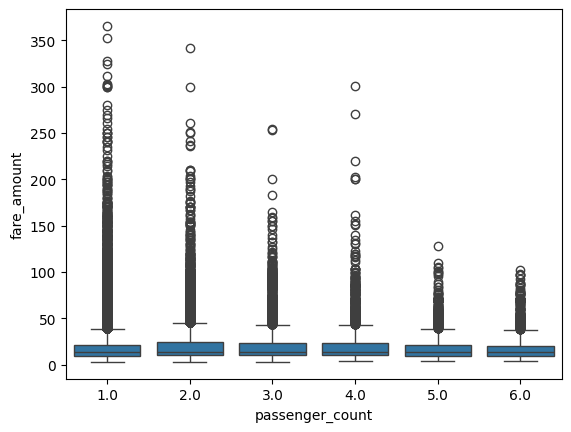

In [60]:
sns.boxplot(x='passenger_count', y='fare_amount', data=df_copy)

In [61]:
corr_filtered = df_copy['passenger_count'].corr(df_copy['fare_amount'])
print(f"Correlation (filtered): {corr_filtered:.3f}")

Correlation (filtered): 0.039


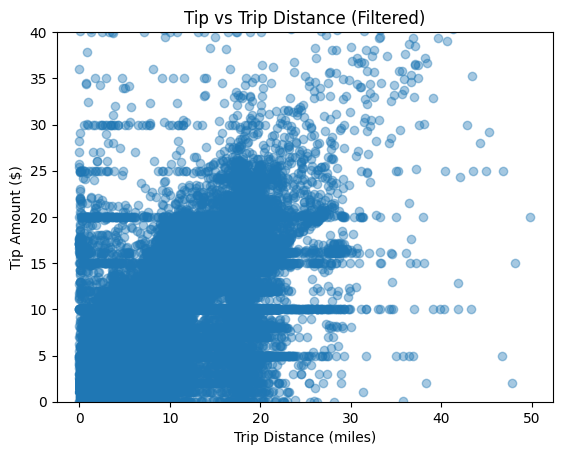

In [127]:
# Show relationship between tip and trip distance
plt.scatter(df_copy[df_copy.trip_distance < 50].trip_distance,
            df_copy[df_copy.trip_distance < 50].tip_amount,alpha=0.4)
plt.ylim(0, 40)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Tip vs Trip Distance (Filtered)")
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [66]:
# Analyse the distribution of different payment types (payment_type).

df['payment_type'].value_counts()

payment_type
1    298534
2     63231
4      2695
3      1712
Name: count, dtype: int64

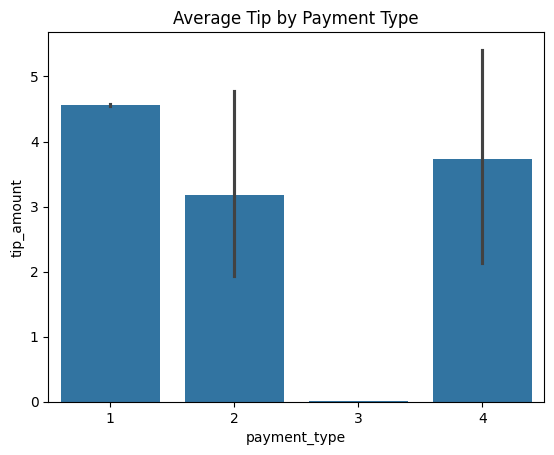

In [67]:
sns.barplot(x='payment_type', y='tip_amount', data=df_copy)
plt.title("Average Tip by Payment Type")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [72]:
print(os.getcwd())

d:\Upgrad\EDA\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records


In [28]:
import geopandas as gpd


# Read the shapefile using geopandas
zones =  gpd.read_file(r"../taxi_zones/taxi_zones.shp")# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             263 non-null    int32   
 1   Shape_Leng           263 non-null    float64 
 2   Shape_Area           263 non-null    float64 
 3   zone                 263 non-null    object  
 4   LocationID           263 non-null    int32   
 5   borough              263 non-null    object  
 6   geometry             263 non-null    geometry
 7   trip_count           263 non-null    int64   
 8   avg_passenger_count  167 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), int64(1), object(2)
memory usage: 16.6+ KB
None


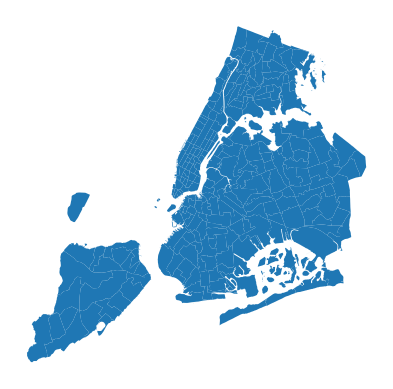

In [156]:
print(zones.info())
zones.plot()
plt.axis('off')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [29]:
# Merge zones and trip records using locationID and PULocationID

df_copy = df_copy.merge(
    zones,
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)
df_copy.rename(columns={'zone': 'PU_Zone', 'borough': 'PU_Borough', 'geometry': 'PU_geometry'}, inplace=True)
df_copy.drop(columns=['LocationID'], inplace=True)  # drop the duplicate LocationID column

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [37]:
# Group data by location and calculate the number of trips
trip_counts = df_copy['PULocationID'].value_counts().sort_index().reset_index()
trip_counts.columns = ['PULocationID', 'trip_count']

In [38]:
trip_counts

,PULocationID,trip_count
0,1,6
1,4,271
2,6,1
3,7,48
4,9,1
...,...,...
163,261,1379
164,262,3803
165,263,5537
166,264,2396


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [41]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(
    trip_counts,
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
)

In [42]:
zones['trip_count'] = zones['trip_count'].fillna(0).astype(int)
zones.drop(columns=['PULocationID'], inplace=True) # Duplicate column to be dropped after merge

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

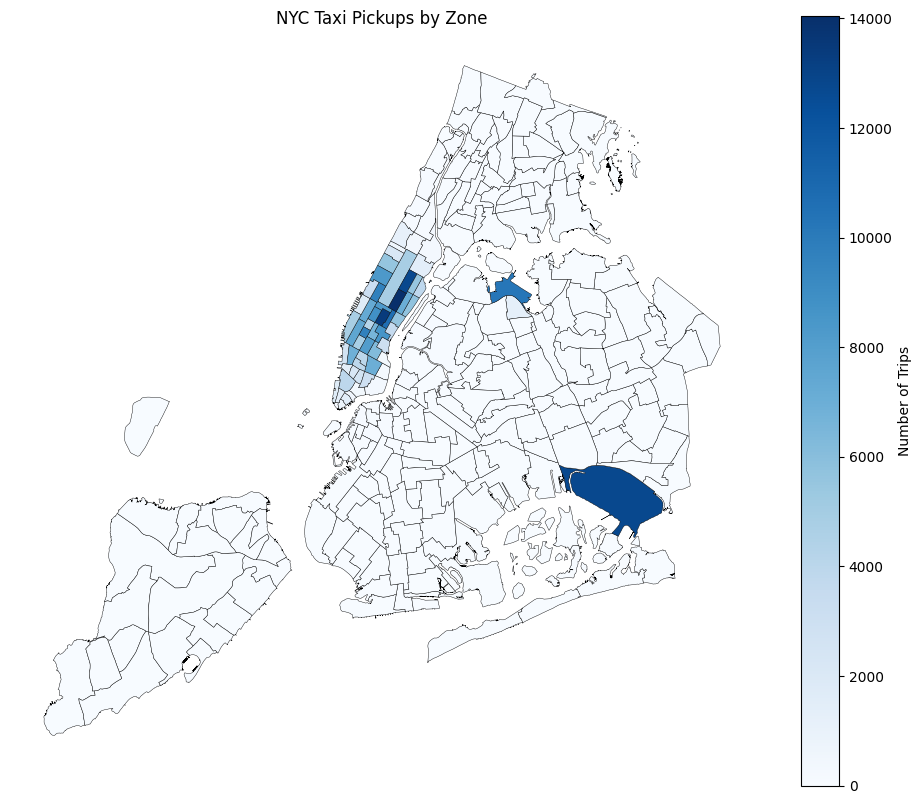

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(
    column = 'trip_count',
    ax=ax,
    legend = True,
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
    cmap='Blues',                
    edgecolor='black',          
    linewidth=0.3
)
plt.title("NYC Taxi Pickups by Zone")
plt.axis('off') 
plt.show()

In [46]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='trip_count', ascending=False)
print(zones_sorted[['LocationID', 'zone', 'borough', 'trip_count']].head(10)) 

     LocationID                          zone    borough  trip_count
236         237         Upper East Side South  Manhattan       14053
160         161                Midtown Center  Manhattan       13428
235         236         Upper East Side North  Manhattan       12786
131         132                   JFK Airport     Queens       12752
161         162                  Midtown East  Manhattan       10667
137         138             LaGuardia Airport     Queens       10249
141         142           Lincoln Square East  Manhattan        9709
185         186  Penn Station/Madison Sq West  Manhattan        9688
229         230     Times Sq/Theatre District  Manhattan        8829
169         170                   Murray Hill  Manhattan        8591


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [48]:
# Find routes which have the slowest speeds at different times of the day

#First we grouped the data by pickup drop and hour basis, and then on this aggregated data we find the mean trip dist and duration
grouped = df_copy.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration': 'mean'
}).reset_index() 

In [49]:
grouped['avg_speed'] = grouped['trip_distance'] / (grouped['trip_duration'] / 60)  # mph

In [62]:
grouped = grouped[grouped.trip_duration>0]
grouped[grouped.avg_speed>1].sort_values(by='avg_speed').head(10)

,PULocationID,DOLocationID,pickup_hour,trip_distance,trip_duration,avg_speed
57302,262,229,11,1.860000,110.950000,1.005858
8715,79,48,19,3.316250,193.129167,1.030269
6427,68,163,15,2.158571,124.971429,1.036351
46847,233,79,20,2.068462,118.882051,1.043957
35140,163,68,22,2.029286,115.664286,1.052677
24980,140,238,16,2.826000,160.718333,1.055013
34140,162,142,15,1.861250,105.533333,1.058196
14670,107,236,0,3.405000,192.597917,1.060759
33061,161,189,23,8.790000,495.650000,1.064057
25857,141,170,13,2.092143,114.697619,1.094430


In [56]:
grouped[['trip_distance', 'trip_duration','avg_speed']].describe()

,trip_distance,trip_duration,avg_speed
count,59038.000000,59038.000000,59038.000000
mean,4.756091,20.499400,13.462152
std,5.269759,26.105398,39.447902
min,0.010000,0.033333,0.043579
25%,1.696667,10.900000,8.435438
50%,3.103333,17.063148,11.182050
75%,5.860000,25.350000,15.934278
max,570.737647,1437.216667,9012.857143


How does identifying high-traffic, high-demand routes help us?

If we see above, we can recognize many slow route, there are routes where avg speed is below 0.1 mile per hour, now this could be due to corrupt data. Identifying High-demand route can help us from the cab companies persepective in following ways:
Rerouting drivers to save fuel and time, as time lost is the lost oppurtunity worth other rides
Take into account the time and money lost due to operations on these routes

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<Axes: xlabel='pickup_hour'>

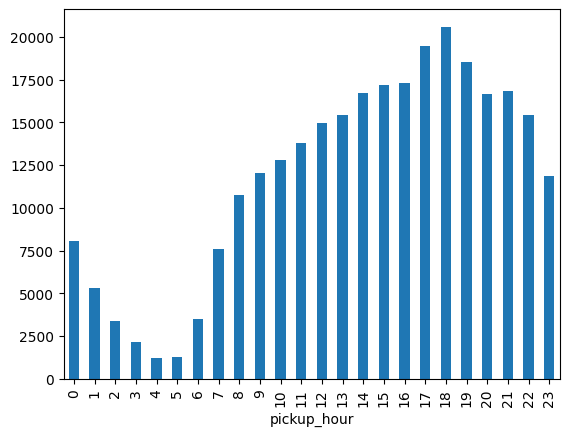

In [65]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df_copy['pickup_hour'].value_counts().sort_index()
trips_per_hour.plot.bar()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [67]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01

top_5_hours = trips_per_hour.sort_values(ascending=False).head(5)
estimated_top_5 = (top_5_hours / sample_fraction).astype(int)
print("Top 5 Busiest Hours and Estimated Total Trips:")
print(estimated_top_5)

Top 5 Busiest Hours and Estimated Total Trips:
pickup_hour
18    2058700
17    1948400
19    1851600
16    1731300
15    1716300
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [71]:
# Compare traffic trends for the week days and weekends
df_copy['day_type'] = df_copy['pickup_weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

traffic_by_hour = df_copy.groupby(['day_type', 'pickup_hour']).size().reset_index(name='num_trips')

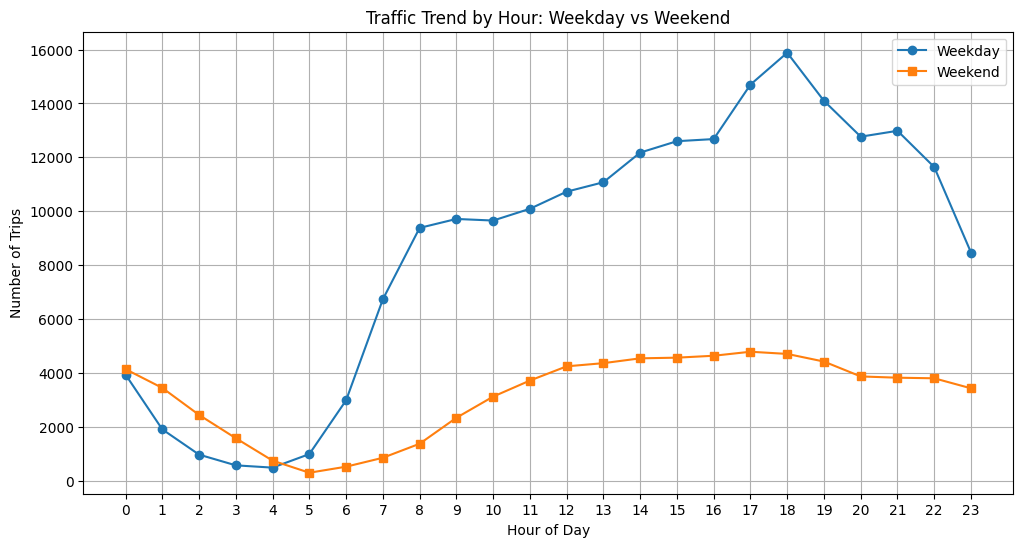

In [ ]:
pivot_df = traffic_by_hour.pivot(index='pickup_hour', columns='day_type', values='num_trips')

plt.figure(figsize=(12, 6))
plt.plot(pivot_df['Weekday'], label='Weekday', marker='o')
plt.plot(pivot_df['Weekend'], label='Weekend', marker='s')
plt.title('Traffic Trend by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Without normalizing for weekdays, we can infer a lot: 
on weekdays midnight travels are very less, but for weekends we can see its a lot
On weekdays the trips count peak around 6pm, as people rush back from office but for weekends its relatively more uniform
This info can help us in pricing strategy taking into account of peak rush hours and assigning fleets

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [141]:
# Find top 10 pickup and dropoff zones
top_10_pickups = df_copy['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones:\n", top_10_pickups)

top_10_dropoffs = df_copy['DOLocationID'].value_counts().head(10)
print("Top 10 Dropoff Zones:\n", top_10_dropoffs)

Top 10 Pickup Zones:
 PULocationID
237    14053
161    13428
236    12786
132    12752
162    10667
138    10249
142     9709
186     9688
230     8829
170     8591
Name: count, dtype: int64
Top 10 Dropoff Zones:
 DOLocationID
236    13524
237    12507
161    11120
170     8703
239     8517
142     8307
162     8242
141     7992
230     7734
68      7254
Name: count, dtype: int64


In [ ]:
# Get top 10 pickup zones by count
top_10_pickups = df_copy['PULocationID'].value_counts().head(10).reset_index()
top_10_pickups.columns = ['LocationID', 'Pickup_Count']

# Merge with zone_df to get Zone and Borough info
top_10_pickups_named = top_10_pickups.merge(zones, left_on='LocationID', right_on='LocationID')

print("Top 10 Pickup Zones with Names and Boroughs:\n")
print(top_10_pickups_named[['LocationID', 'zone', 'borough', 'Pickup_Count']])

#Similarly for dropoffs

top_10_dropoffs = df_copy['DOLocationID'].value_counts().head(10).reset_index()
top_10_dropoffs.columns = ['LocationID', 'Dropoff_Count']

top_10_dropoffs_named = top_10_dropoffs.merge(zones, left_on='LocationID', right_on='LocationID')

print("Top 10 Dropoff Zones with Names and Boroughs:\n")
print(top_10_dropoffs_named[['LocationID', 'zone', 'borough', 'Dropoff_Count']])

Top 10 Pickup Zones with Names and Boroughs:

   LocationID                          zone    borough  Pickup_Count
0         237         Upper East Side South  Manhattan         14053
1         161                Midtown Center  Manhattan         13428
2         236         Upper East Side North  Manhattan         12786
3         132                   JFK Airport     Queens         12752
4         162                  Midtown East  Manhattan         10667
5         138             LaGuardia Airport     Queens         10249
6         142           Lincoln Square East  Manhattan          9709
7         186  Penn Station/Madison Sq West  Manhattan          9688
8         230     Times Sq/Theatre District  Manhattan          8829
9         170                   Murray Hill  Manhattan          8591
Top 10 Dropoff Zones with Names and Boroughs:

   LocationID                       zone    borough  Dropoff_Count
0         236      Upper East Side North  Manhattan          13524
1         237 

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [76]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups and dropoffs per zone
pickup_counts = df_copy['PULocationID'].value_counts()
dropoff_counts = df_copy['DOLocationID'].value_counts()

ratio_df = pd.DataFrame({
    'pickups': pickup_counts,
    'dropoffs': dropoff_counts
})

ratio_df.fillna(0, inplace=True)

ratio_df['dropoff_safe'] = ratio_df['dropoffs'].replace(0, np.nan)

ratio_df['pickup_drop_ratio'] = ratio_df['pickups'] / ratio_df['dropoff_safe']

top_10_ratios = ratio_df.sort_values(by='pickup_drop_ratio', ascending=False).head(10)
print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratios)

Top 10 Pickup/Dropoff Ratios:
      pickups  dropoffs  dropoff_safe  pickup_drop_ratio
70    1293.0        93            93          13.903226
132  12752.0      2673          2673           4.770670
138  10249.0      3522          3522           2.909994
215     27.0        15            15           1.800000
186   9688.0      5997          5997           1.615474
43    4881.0      3472          3472           1.405818
249   6892.0      5065          5065           1.360711
114   3856.0      2862          2862           1.347310
162  10667.0      8242          8242           1.294225
100   4269.0      3518          3518           1.213474


In [77]:
bottom_10_ratios = ratio_df[ratio_df['pickup_drop_ratio'].notna()] \
                      .sort_values(by='pickup_drop_ratio', ascending=True) \
                      .head(10)
print("Bottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratios)

Bottom 10 Pickup/Dropoff Ratios:
     pickups  dropoffs  dropoff_safe  pickup_drop_ratio
3       0.0         9             9                0.0
5       0.0         1             1                0.0
8       0.0         3             3                0.0
11      0.0        10            10                0.0
15      0.0        14            14                0.0
16      0.0        36            36                0.0
19      0.0        21            21                0.0
31      0.0        12            12                0.0
27      0.0         8             8                0.0
30      0.0         2             2                0.0


In [130]:
ratio_df['pickup_drop_ratio'].describe()

count    252.000000
mean       0.348141
std        1.001314
min        0.000000
25%        0.000000
50%        0.062500
75%        0.333333
max       13.903226
Name: pickup_drop_ratio, dtype: float64

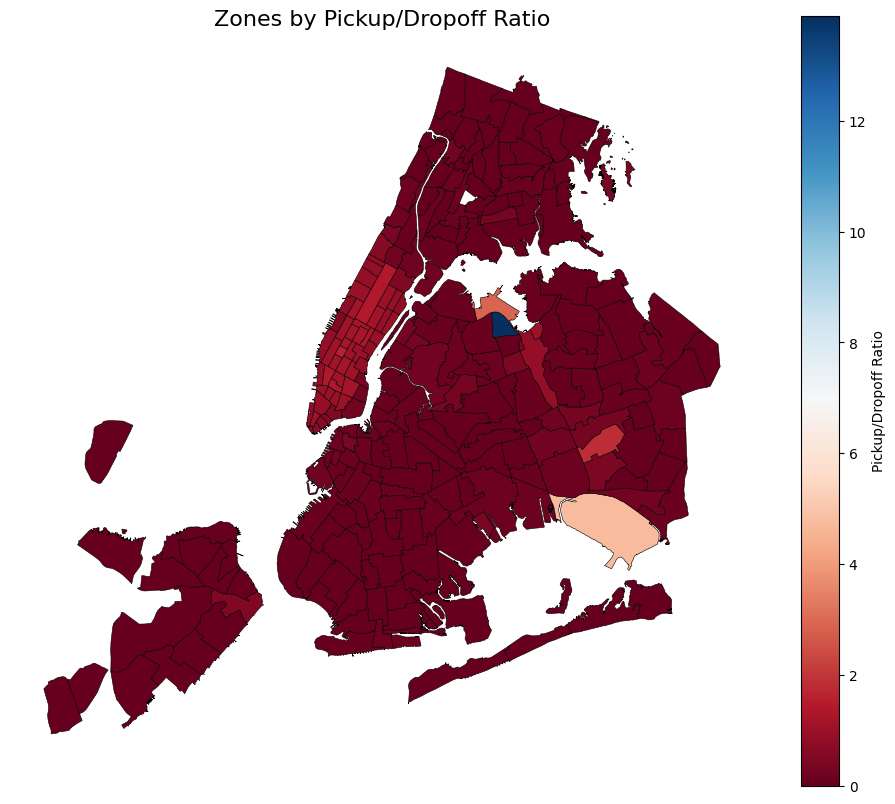

In [129]:
zone_stats = zones
zone_stats = pd.DataFrame({
    'LocationID': df_copy['PULocationID'].value_counts(),
    'Dropoffs': df_copy['DOLocationID'].value_counts()
}).fillna(0)

zone_stats['PU_DO_ratio'] = zone_stats['LocationID'] / (zone_stats['Dropoffs'] + 1e-6)  # avoid divide by zero
zone_stats = zone_stats.reset_index().rename(columns={'index': 'LocationID', 'LocationID': 'Pickups'})

# Merge with GeoDataFrame
zones_with_ratio = zones.merge(zone_stats, on='LocationID')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_ratio.plot(
    column='PU_DO_ratio',
    ax=ax,
    cmap='RdBu',
    legend=True,
    legend_kwds={'label': "Pickup/Dropoff Ratio", 'orientation': "vertical"},
    edgecolor='black',
    linewidth=0.4
)

ax.set_title("Zones by Pickup/Dropoff Ratio", fontsize=16)
ax.axis('off')
plt.show()

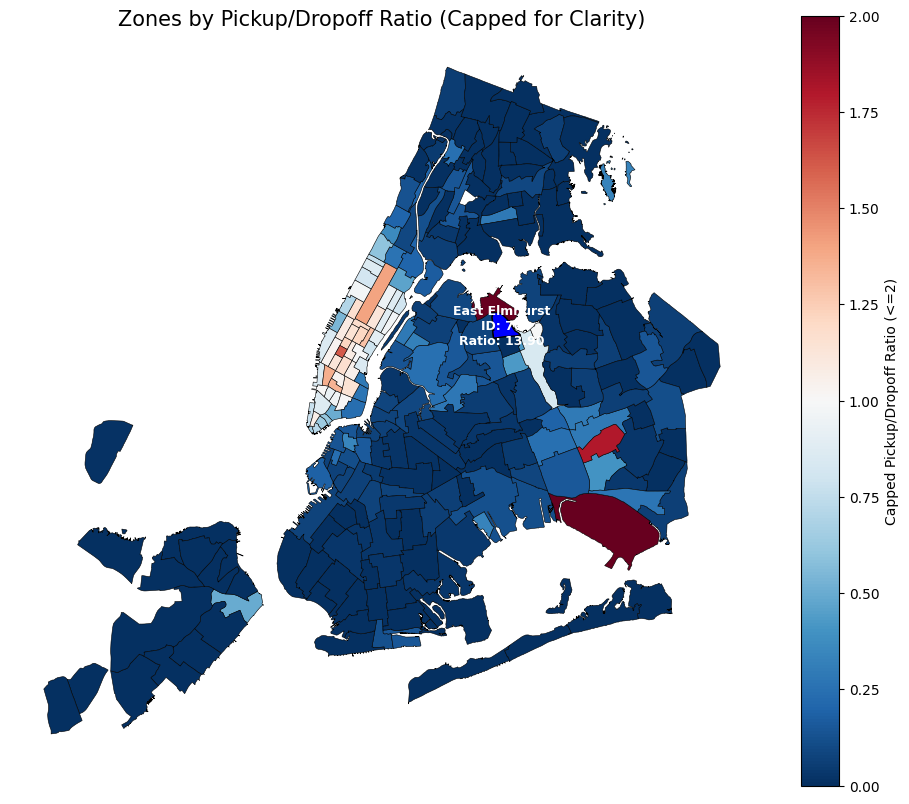

🔵 Zone with highest PU/DO ratio:
- Zone Name: East Elmhurst
- LocationID: 70
- Ratio: 13.90


In [131]:
# Cap PU/DO ratio at a max value for visualization clarity
capped_zones = zones_with_ratio.copy()
capped_zones['PU_DO_ratio_capped'] = capped_zones['PU_DO_ratio'].clip(upper=2)  # or upper=3

# Find the max PU/DO zone
max_row = zones_with_ratio.loc[zones_with_ratio['PU_DO_ratio'].idxmax()]
max_zone_name = max_row['zone']
max_zone_id = max_row['LocationID']
max_ratio = max_row['PU_DO_ratio']

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
capped_zones.plot(
    column='PU_DO_ratio_capped',
    ax=ax,
    cmap='RdBu_r',
    legend=True,
    legend_kwds={'label': "Capped Pickup/Dropoff Ratio (<=2)", 'orientation': "vertical"},
    edgecolor='black',
    linewidth=0.4
)

# Annotate the standout blue zone
zones_with_ratio[zones_with_ratio['LocationID'] == max_zone_id].plot(ax=ax, color='blue', edgecolor='black')
plt.text(
    max_row['geometry'].centroid.x, max_row['geometry'].centroid.y,
    f"{max_zone_name}\nID: {max_zone_id}\nRatio: {max_ratio:.2f}",
    color='white', fontsize=9, ha='center', va='center', weight='bold'
)

ax.set_title("Zones by Pickup/Dropoff Ratio (Capped for Clarity)", fontsize=15)
ax.axis('off')
plt.show()

print(f"🔵 Zone with highest PU/DO ratio:\n- Zone Name: {max_zone_name}\n- LocationID: {max_zone_id}\n- Ratio: {max_ratio:.2f}")


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df_copy['pickup_datetime'] = pd.to_datetime(df_copy['tpep_pickup_datetime'])
df_copy['dropoff_datetime'] = pd.to_datetime(df_copy['tpep_dropoff_datetime'])

# Extract the hour of pickup and dropoff
df_copy['pickup_hour'] = df_copy['pickup_datetime'].dt.hour
df_copy['dropoff_hour'] = df_copy['dropoff_datetime'].dt.hour

# Define night hours (23 to 5)
night_hours = list(range(0, 6)) + [23]

night_pickups = df_copy[df_copy['pickup_hour'].isin(night_hours)]
night_dropoffs = df_copy[df_copy['dropoff_hour'].isin(night_hours)]

In [ ]:
top_night_pickup_zones = night_pickups['PULocationID'].value_counts().head(10)
print("Top 10 Night Pickup Zones:\n", top_night_pickup_zones)

top_night_dropoff_zones = night_dropoffs['DOLocationID'].value_counts().head(10)
print("Top 10 Night Dropoff Zones:\n", top_night_dropoff_zones)

Top 10 Night Pickup Zones:
 PULocationID
79     2575
249    2137
132    1949
148    1607
48     1564
114    1391
230    1241
186    1041
138     993
68      945
Name: count, dtype: int64


In [144]:
# Top 10 Night Pickup Zones with Names and Boroughs
top_night_pickups = night_pickups['PULocationID'].value_counts().head(10).reset_index()
top_night_pickups.columns = ['LocationID', 'Night_Pickup_Count']

top_night_pickups_named = top_night_pickups.merge(zones, left_on='LocationID', right_on='LocationID')

print("Top 10 Night Pickup Zones with Names and Boroughs:\n")
print(top_night_pickups_named[['LocationID', 'zone', 'borough', 'Night_Pickup_Count']])

# Top 10 Night Dropoff Zones with Names and Boroughs
top_night_dropoffs = night_dropoffs['DOLocationID'].value_counts().head(10).reset_index()
top_night_dropoffs.columns = ['LocationID', 'Night_Dropoff_Count']

top_night_dropoffs_named = top_night_dropoffs.merge(zones, left_on='LocationID', right_on='LocationID')

print("Top 10 Night Dropoff Zones with Names and Boroughs:\n")
print(top_night_dropoffs_named[['LocationID', 'zone', 'borough', 'Night_Dropoff_Count']])


Top 10 Night Pickup Zones with Names and Boroughs:

   LocationID                          zone    borough  Night_Pickup_Count
0          79                  East Village  Manhattan                2575
1         249                  West Village  Manhattan                2137
2         132                   JFK Airport     Queens                1949
3         148               Lower East Side  Manhattan                1607
4          48                  Clinton East  Manhattan                1564
5         114       Greenwich Village South  Manhattan                1391
6         230     Times Sq/Theatre District  Manhattan                1241
7         186  Penn Station/Madison Sq West  Manhattan                1041
8         138             LaGuardia Airport     Queens                 993
9          68                  East Chelsea  Manhattan                 945
Top 10 Night Dropoff Zones with Names and Boroughs:

   LocationID                   zone    borough  Night_Dropoff_Count
0

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [84]:
# Filter for night hours (11 PM to 5 AM)
# Define night (23 to 5) and day (6 to 22) hours

night_hours = list(range(0, 6)) + [23]
df_copy['time_category'] = df_copy['pickup_hour'].apply(lambda x: 'Night' if x in night_hours else 'Day')

# Group by time category and calculate total revenue
revenue_share = df_copy.groupby('time_category')['total_amount'].sum()

# Calculate percentage share
revenue_percent = (revenue_share / revenue_share.sum()) * 100

print("Revenue Share (absolute):\n", revenue_share)
print("\nRevenue Share (percentage):\n", revenue_percent)

Revenue Share (absolute):
 time_category
Day      7341075.97
Night     999874.45
Name: total_amount, dtype: float64

Revenue Share (percentage):
 time_category
Day      88.012464
Night    11.987536
Name: total_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

df_copy['fare_per_mile'] = df_copy['fare_amount']/df_copy['trip_distance']

passenger_fare = df_copy.groupby('passenger_count')['fare_per_mile'].mean()
passenger_fare = pd.DataFrame(passenger_fare).reset_index()

passenger_fare['fare_per_mile_per_passenger'] = passenger_fare['fare_per_mile'] / passenger_fare['passenger_count']

passenger_fare

,passenger_count,fare_per_mile,fare_per_mile_per_passenger
0,1.0,9.150703,9.150703
1,2.0,10.653140,5.326570
2,3.0,11.810095,3.936698
3,4.0,14.703518,3.675879
4,5.0,7.579811,1.515962
5,6.0,7.590740,1.265123


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [101]:
# Compare the average fare per mile for different days and for different times of the day

df_copy['day_of_week'] = df_copy['pickup_datetime'].dt.dayofweek

fare_by_day = df_copy.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
fare_by_day.columns = ['Day of Week', 'Average Fare per Mile']

fare_by_hour = df_copy.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
fare_by_hour.columns = ['Hour of Day', 'Average Fare per Mile']

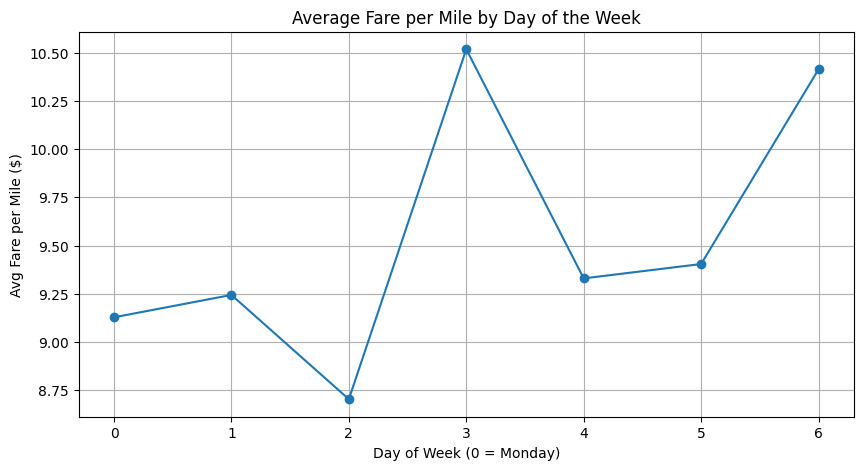

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(fare_by_day['Day of Week'], fare_by_day['Average Fare per Mile'], marker='o')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Avg Fare per Mile ($)')
plt.show()

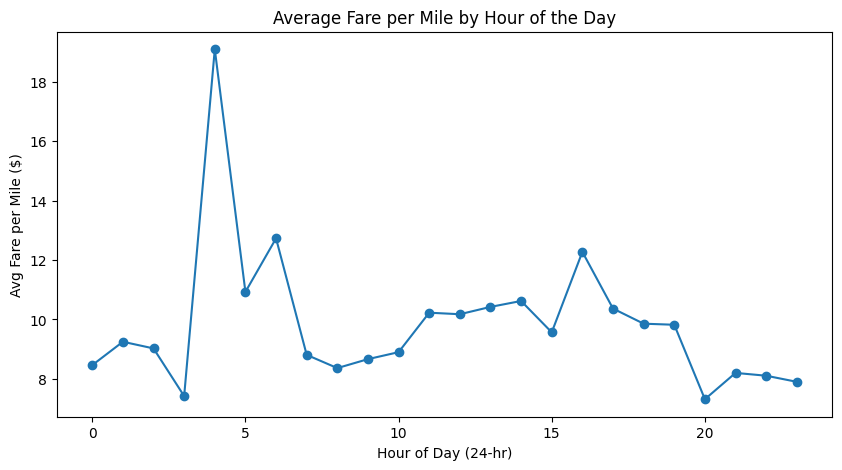

In [103]:
plt.figure(figsize=(10, 5))
plt.plot(fare_by_hour['Hour of Day'], fare_by_hour['Average Fare per Mile'], marker='o')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of Day (24-hr)')
plt.ylabel('Avg Fare per Mile ($)')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [106]:
# Compare fare per mile for different vendors
df_copy.groupby('VendorID')['fare_per_mile'].mean()

VendorID
1     7.882721
2    10.087679
Name: fare_per_mile, dtype: float64

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [109]:
# Defining distance tiers

# Define distance bins
bins = [0, 2, 5, float('inf')]
labels = ['0-2 miles', '2-5 miles', '5+ miles']

# Create tier column
df_copy['distance_tier'] = pd.cut(df_copy['trip_distance'], bins=bins, labels=labels, right=False)

In [110]:
# Group by vendor and tier
vendor_fare_comparison = df_copy.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Rename for clarity
vendor_fare_comparison.columns = ['VendorID', 'Distance Tier', 'Average Fare per Mile']

print(vendor_fare_comparison.sort_values(by=['Distance Tier', 'VendorID']))

   VendorID Distance Tier  Average Fare per Mile
0         1     0-2 miles               9.540645
3         2     0-2 miles              13.743683
1         1     2-5 miles               6.436262
4         2     2-5 miles               6.551485
2         1      5+ miles               4.474127
5         2      5+ miles               4.501630


C:\Users\jayar\AppData\Local\Temp\ipykernel_15260\848022060.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_fare_comparison = df_copy.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_copy['tip_percent'] = (df_copy['tip_amount'] / df_copy['total_amount']) * 100

# Create distance bins
bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['0-2 mi', '2-5 mi', '5-10 mi', '10-20 mi', '20+ mi']
df_copy['distance_bin'] = pd.cut(df_copy['trip_distance'], bins=bins, labels=labels, right=False)

# Group and calculate mean tip %
distance_tip = df_copy.groupby('distance_bin')['tip_percent'].mean().reset_index()

passenger_tip = df_copy.groupby('passenger_count')['tip_percent'].mean().reset_index()

hourly_tip = df_copy.groupby('pickup_hour')['tip_percent'].mean().reset_index()

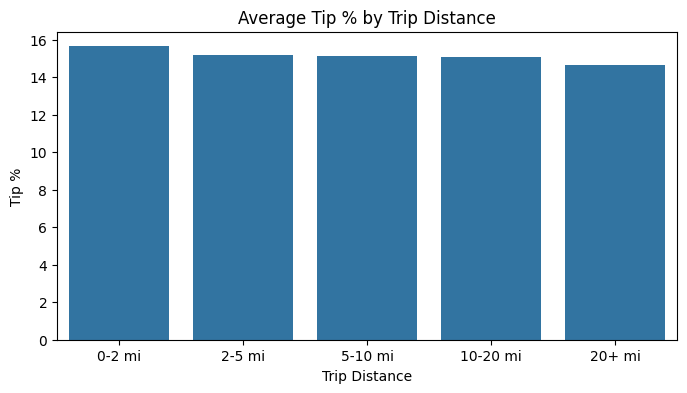

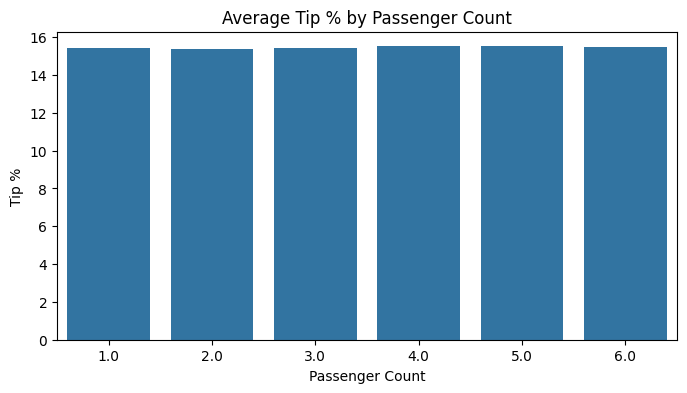

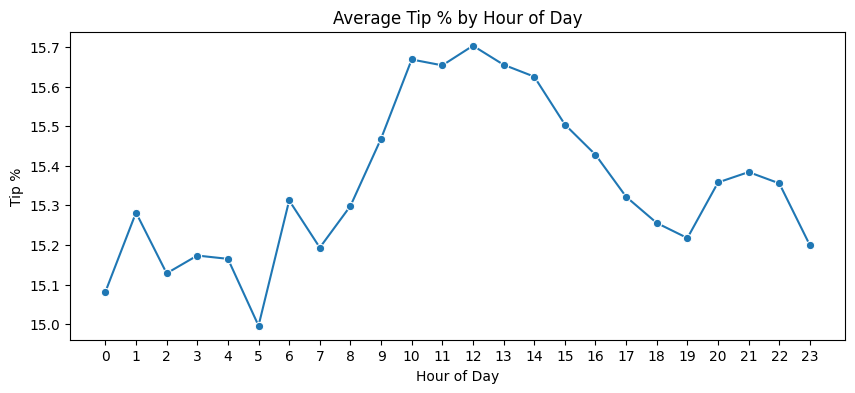

In [114]:
# Distance bins
plt.figure(figsize=(8, 4))
sns.barplot(data=distance_tip, x='distance_bin', y='tip_percent')
plt.title('Average Tip % by Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip %')
plt.show()

# Passenger count
plt.figure(figsize=(8, 4))
sns.barplot(data=passenger_tip, x='passenger_count', y='tip_percent')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip %')
plt.show()

# Hour of day
plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_tip, x='pickup_hour', y='tip_percent', marker='o')
plt.title('Average Tip % by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Tip %')
plt.xticks(range(0, 24))
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

pickup_hour
0     1.414302
1     1.450290
2     1.427941
3     1.442209
4     1.363934
5     1.308477
6     1.236052
7     1.273231
8     1.282936
9     1.302723
10    1.344609
11    1.344997
12    1.355449
13    1.359702
14    1.375890
15    1.406223
16    1.385202
17    1.359064
18    1.352698
19    1.370328
20    1.369364
21    1.403451
22    1.420510
23    1.440296
Name: passenger_count, dtype: float64

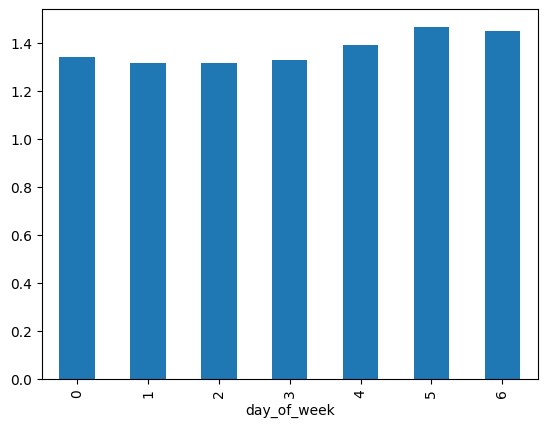

In [159]:
# See how passenger count varies across hours and days

df_copy.groupby('day_of_week')['passenger_count'].mean().plot.bar()
df_copy.groupby('pickup_hour')['passenger_count'].mean()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [160]:
# How does passenger count vary across zones

df_copy.groupby('PULocationID')['passenger_count'].mean().sort_values()

PULocationID
9      1.000000
29     1.000000
26     1.000000
14     1.000000
46     1.000000
         ...   
56     2.166667
160    2.500000
6      3.000000
175    3.500000
47     5.000000
Name: passenger_count, Length: 168, dtype: float64

In [120]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_count = df_copy.groupby('PULocationID')['passenger_count'].mean()
avg_passenger_count = avg_passenger_count.rename('avg_passenger_count')

zones = zones.merge(
    avg_passenger_count,
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
)

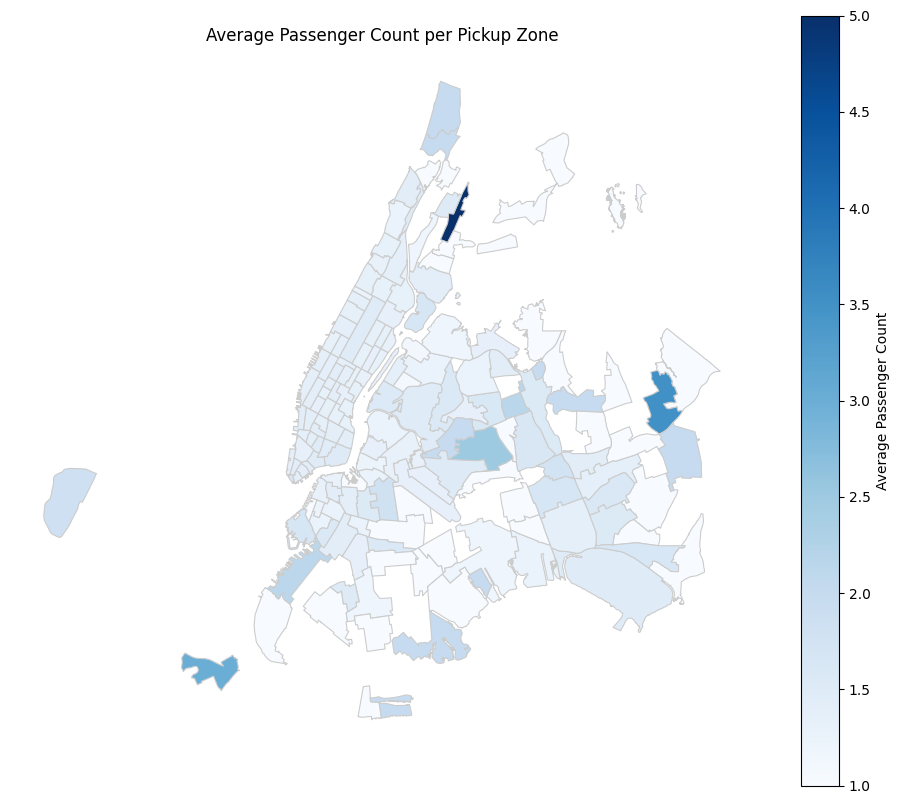

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(
    column='avg_passenger_count',
    cmap='Blues',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Average Passenger Count", 'orientation': "vertical"}
)
plt.title("Average Passenger Count per Pickup Zone")
plt.axis("off")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [124]:
# How often is each surcharge applied?

df_copy['improvement_surcharge'].value_counts(normalize=True) * 100  # in percentage

improvement_surcharge
1.0    99.960046
0.3     0.038893
0.0     0.001061
Name: proportion, dtype: float64

In [125]:
df_copy['congestion_surcharge'].value_counts(normalize=True) * 100  # in percentage

congestion_surcharge
2.5    94.939981
0.0     5.060019
Name: proportion, dtype: float64

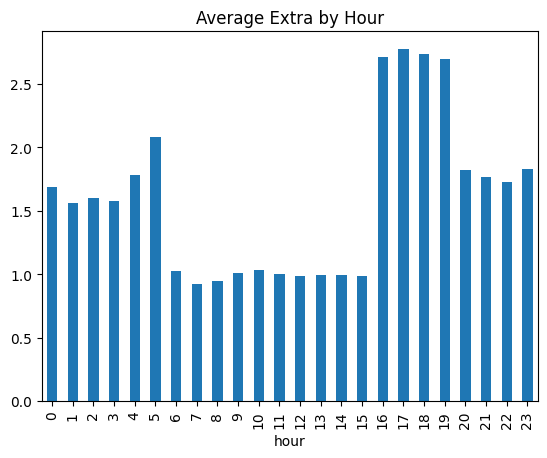

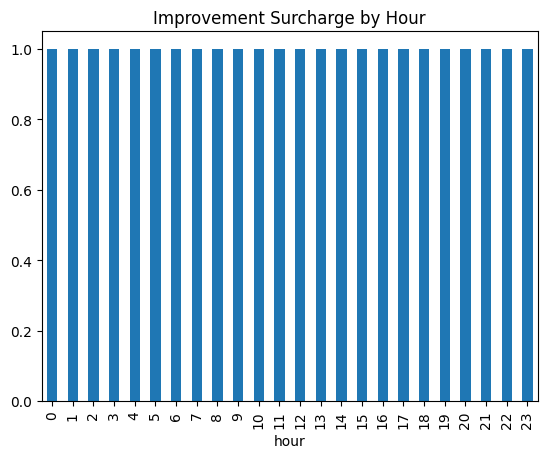

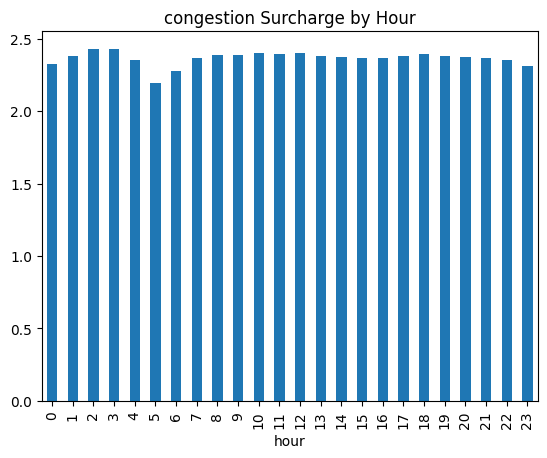

In [150]:
df_copy['hour'] = df_copy['tpep_pickup_datetime'].dt.hour
df_copy['weekday'] = df_copy['tpep_pickup_datetime'].dt.day_name()

# Temporal pattern of 'extra' and 'improvement_surcharge'
extra_by_hour = df_copy.groupby('hour')['extra'].mean()
improvement_by_hour = df_copy.groupby('hour')['improvement_surcharge'].mean()
congestion_by_hour = df_copy.groupby('hour')['congestion_surcharge'].mean()

extra_by_weekday = df_copy.groupby('weekday')['extra'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

extra_by_hour.plot(kind='bar', title='Average Extra by Hour')
plt.show()

improvement_by_hour.plot(kind='bar', title='Improvement Surcharge by Hour')
plt.show()

congestion_by_hour.plot(kind='bar', title='congestion Surcharge by Hour')
plt.show()

In [152]:
# Average surcharges by pickup location
zone_extra_avg = df_copy.groupby('PULocationID')[['extra', 'improvement_surcharge']].mean().reset_index()

# Rename for merging
zone_extra_avg = zone_extra_avg.rename(columns={'PULocationID': 'LocationID'})

# Merge with zone information
zone_extra_named = zone_extra_avg.merge(zones, on='LocationID')

# Top zones by avg 'extra' charge
top_extra_zones = zone_extra_named.sort_values('extra', ascending=False).head(10)
print("Top 10 Pickup Zones by Average 'Extra' Charge:\n")
print(top_extra_zones[['LocationID', 'zone', 'borough', 'extra']])

# Top zones by avg 'improvement_surcharge'
top_improvement_zones = zone_extra_named.sort_values('improvement_surcharge', ascending=False).head(10)
print("\nTop 10 Pickup Zones by Average 'Improvement Surcharge':\n")
print(top_improvement_zones[['LocationID', 'zone', 'borough', 'improvement_surcharge']])


Top 10 Pickup Zones by Average 'Extra' Charge:

     LocationID                zone    borough     extra
81          138   LaGuardia Airport     Queens  6.282667
43           70       East Elmhurst     Queens  4.708043
4             9          Auburndale     Queens  2.500000
26           46         City Island      Bronx  2.500000
119         194     Randalls Island  Manhattan  2.083333
73          129     Jackson Heights     Queens  2.034091
131         215       South Jamaica     Queens  1.833333
62          106             Gowanus   Brooklyn  1.785714
16           34  Brooklyn Navy Yard   Brooklyn  1.750000
98          161      Midtown Center  Manhattan  1.711052

Top 10 Pickup Zones by Average 'Improvement Surcharge':

    LocationID                     zone        borough  improvement_surcharge
0            1           Newark Airport            EWR                    1.0
1            4            Alphabet City      Manhattan                    1.0
2            6  Arrochar/Fort Wad

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Optimizing routing and despatching:**

**Time of Day Effects:** The busiest hours were observed between 5 PM to 8 PM, especially on weekdays, with increased demand for pickups in Manhattan. Dispatching more cabs preemptively in these hours can reduce passenger wait times.

**Inefficient Routes:** Some routes consistently show slow speeds, especially in congested areas during peak hours. For example, average speeds dropped to as low as 0.04 mph in certain zones, often due to traffic congestion or signals. These bottlenecks should be avoided or rerouted using real-time traffic data.

**Pickup/Dropoff Ratios:** Some regions are popular for pickups and other for dropoffs, using the PU/DO ratios we can devise strategies to optimize dispatching, like matching two nearest zones one having High PU/DO ratio to the low PU/DO ratio so cabs from a zone which is popular for dropoff can be sent to its nearest zone high PU/DO zone for pickups again.
For eg: East Elmhurst (Location ID - 70) has a exceptionally high PU/DO ratio maybe because of its airport. So to optimize routing, we can dispatch cabs from neighbouring zones low PU/DO to minimize waiting times

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**High-Demand Zones**: Most zones in Manhattan are hotspots for both pickups and drop-offs. Placing idle cabs strategically in or near these areas can increase trip frequency and revenue.

**Temporal Positioning:**

Temporal analysis shows that trip volume peaks in the evening on weekdays, while weekends have a more uniform trip distribution, with notable midnight travel. 

Weekday Strategy: More cabs should be dispatched and available between 5–8 PM. Reduced fleet may suffice after midnight.

Weekend Strategy: Fleet availability should remain consistently high throughout the day, especially ensuring night coverage due to steady demand.

**Zone-specific strategy:** Zones with higher tip percentages often correlate with longer trips and better service, especially in affluent neighborhoods or airport routes. Positioning cabs in such zones can increase driver incentives and revenue.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Fare per Mile by Distance Tiers:**

For short trips (< 2 miles), Vendor A generally offers slightly higher per-mile rates than Vendor B.

For longer trips (> 5 miles), fares level out, making competitive pricing essential.

Night vs. Day Revenue Share: Night trips contribute less to overall trip volume but can generate proportionally higher average fares (due to surcharges and longer distances). Maintain night surcharges to encourage availability during these hours.

**Tips & Service Quality: Higher tip percentages correlate with:**

->Longer distances,

->Lower passenger counts (1–2),

->Midday and evening pickups.

There is a potential that the company can explore personalized service or premium options during these periods to encourage tipping and improve driver earnings.
